In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import AdaBoostRegressor

In [8]:
# import dataset and split into the Training and Test set
df = pd.read_csv('boston.csv')
print('The shape of raw data: ', df.shape)
X_sk = df.iloc[:, :-1].values
y_sk = df.iloc[:, -1].values
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X_sk, y_sk, test_size = 0.2, random_state = 0)
print('The shape of Training data: ',X_train_sk.shape, y_train_sk.shape)
print('The shape of Test data: ',X_test_sk.shape, y_test_sk.shape)
print('X_train_sk', X_train_sk[:2])

The shape of raw data:  (506, 14)
The shape of Training data:  (404, 13) (404,)
The shape of Test data:  (102, 13) (102,)
X_train_sk [[3.5809e-01 0.0000e+00 6.2000e+00 1.0000e+00 5.0700e-01 6.9510e+00
  8.8500e+01 2.8617e+00 8.0000e+00 3.0700e+02 1.7400e+01 3.9170e+02
  9.7100e+00]
 [1.5876e-01 0.0000e+00 1.0810e+01 0.0000e+00 4.1300e-01 5.9610e+00
  1.7500e+01 5.2873e+00 4.0000e+00 3.0500e+02 1.9200e+01 3.7694e+02
  9.8800e+00]]


In [9]:
# Normalization
std_x = StandardScaler()
X_train_sk = std_x.fit_transform(X_train_sk) #fit and transform
X_test_sk = std_x.transform(X_test_sk) #use the same fit metrics as above to transform
print('X_train_sk', X_train_sk[:2])

X_train_sk [[-0.37257438 -0.49960763 -0.70492455  3.66450153 -0.42487874  0.93567804
   0.69366877 -0.4372179  -0.16224243 -0.56165616 -0.48463784  0.3716906
  -0.41100022]
 [-0.39709866 -0.49960763 -0.04487755 -0.27288841 -1.24185891 -0.49118121
  -1.8355285   0.73005474 -0.62464765 -0.57337637  0.33649132  0.20501196
  -0.38768057]]


In [10]:
# Fitting Simple Linear Regression to the Training set
regressor_sk = AdaBoostRegressor()
regressor_sk.fit(X_train_sk, y_train_sk)
print('The shape of Training data: ',X_train_sk.shape)
print('The shape of Test data: ',X_test_sk.shape)

The shape of Training data:  (404, 13)
The shape of Test data:  (102, 13)


In [11]:
# Predicting the Test set results
y_pred = regressor_sk.predict(X_test_sk)

MSE = 28.40085105292288
RMSE = 5.329244885809141
R2_train =  0.9194002618107527
R2_test =  0.6512170516822327
Variance =  50.88941145372006
Bias =  30.56120298490889


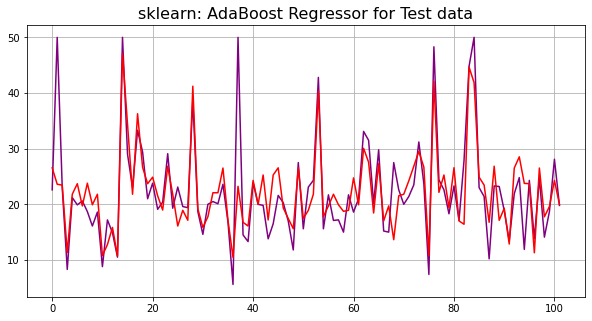

In [12]:
# Evaluation
print("MSE =",mean_squared_error(y_test_sk, y_pred))
print("RMSE =",np.sqrt(mean_squared_error(y_test_sk, y_pred)))
print('R2_train = ',regressor_sk.score(X_train_sk, y_train_sk))
print('R2_test = ',regressor_sk.score(X_test_sk, y_test_sk))
Variance = np.var(y_pred)
print('Variance = ', Variance)
SSE = np.mean((np.mean(y_pred) - y_test_sk)** 2)  
Bias = SSE - Variance
print('Bias = ', Bias)

plt.figure(figsize=(10,5))
plt.title('sklearn: AdaBoost Regressor for Test data',fontsize=16)
plt.grid(True)
plt.plot(y_test_sk, color='purple')
plt.plot(y_pred, color='red')
plt.show()